In [40]:
import numpy
from matplotlib import pyplot

%matplotlib inline

In [41]:
# Set parameters
nx = 41
L = 2.0
dx = L / (nx - 1)

nu = 0.3

sigma = 0.6
dt = sigma * dx**2 / nu
nt = 20

In [42]:
x = numpy.linspace(0.0, L, num = nx)

In [43]:
u0 = numpy.ones(nx)
mask = numpy.where((x >= 0.5) & (x <= 1.0))
u0[mask] = 2.0

In [44]:
u = u0.copy()
for n in range(nt):
    un = u.copy()
    for i in range(1, nx - 1):
        u[i] = un[i] + sigma * (un[i - 1] - 2 * un[i] + un[i + 1])
#    u[0] = 1.0
#    u[-1] = 1.0

u_naive = u

In [45]:
u = u0.copy()
for n in range (nt):
    un = u.copy()
    u[1:-1] = un[1:-1] + sigma * (un[:-2] - 2 * un[1:-1] + un[2:])

In [46]:
numpy.allclose(u_naive, u)

True

In [47]:
def diffusion(u0, sigma=0.5, nt=20):
    u_hist = [u0.copy()]
    u = u0.copy()
    for n in range (nt):
        un = u.copy()
        u[1:-1] = un[1:-1] + sigma * (un[:-2] - 2 * un[1:-1] + un[2:])
        u_hist.append(u.copy())
    return u_hist

In [48]:
u_hist = diffusion(u0, sigma=sigma, nt=nt)

In [49]:
len(u_hist)

21

In [50]:
def plot_solution(n, u_hist, x):
    pyplot.figure()
    pyplot.xlabel('x')
    pyplot.ylabel('u')
    pyplot.grid()
    pyplot.plot(x, u_hist[0], label = 'Initial')
    pyplot.plot(x, u_hist[n], label = 'Current')
    pyplot.legend()
    pyplot.xlim(0.0, 2.0)
    pyplot.ylim(0.5, 2.5)
    pyplot.show()

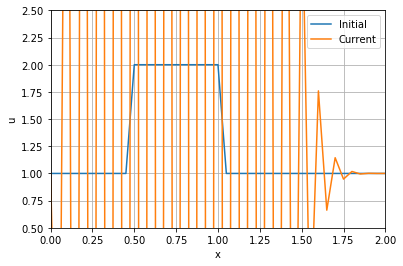

In [51]:
plot_solution(-1, u_hist, x)

In [52]:
import ipywidgets

In [53]:
nt_slider = ipywidgets.IntSlider(value=0, min=0, max=nt, step=1, description='Time step')
w = ipywidgets.interactive(plot_solution, n=nt_slider, u_hist=ipywidgets.fixed(u_hist), x=ipywidgets.fixed(x))

In [54]:
display(w)

interactive(children=(IntSlider(value=0, description='Time step', max=20), Output()), _dom_classes=('widget-in…